In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv('TV_Final.csv')
df.columns


Index(['Brand', 'Resolution', 'Size ', 'Selling Price', 'Original Price',
       'Operating System', 'Rating'],
      dtype='object')

In [22]:
df.shape
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [27]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             912 non-null    object 
 1   Resolution        912 non-null    object 
 2   Size              912 non-null    int64  
 3   Selling Price     912 non-null    int64  
 4   Original Price    912 non-null    int64  
 5   Operating System  901 non-null    object 
 6   Rating            692 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 50.0+ KB


,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


# Q.1 Demand for different types of televisions and Number of Players in the market

In [30]:
demand=df.groupby('Resolution').size()           

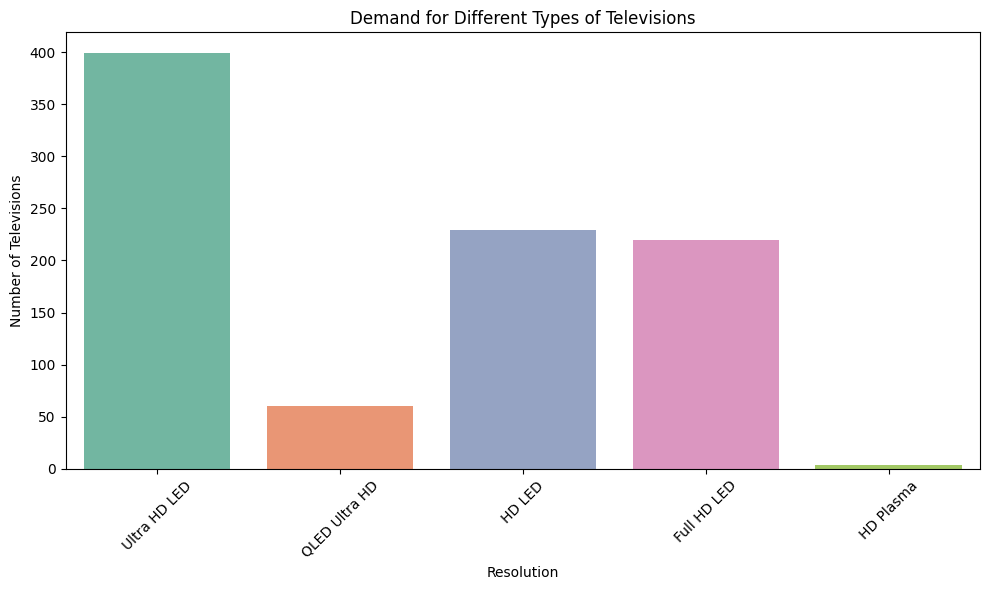

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Resolution', hue='Resolution', palette='Set2', legend=False)
plt.title('Demand for Different Types of Televisions')
plt.xlabel('Resolution')
plt.ylabel('Number of Televisions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
market_players = df['Brand'].nunique()
market_players

59

# Q.2  Which are the top 5 brands for television on the basis of review?

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [60]:
brand_ratings = df.groupby('Brand')['Rating'].mean().reset_index()

# Select the top 5 brands based on the highest average ratings
top_brands = brand_ratings.nlargest(5, 'Rating')



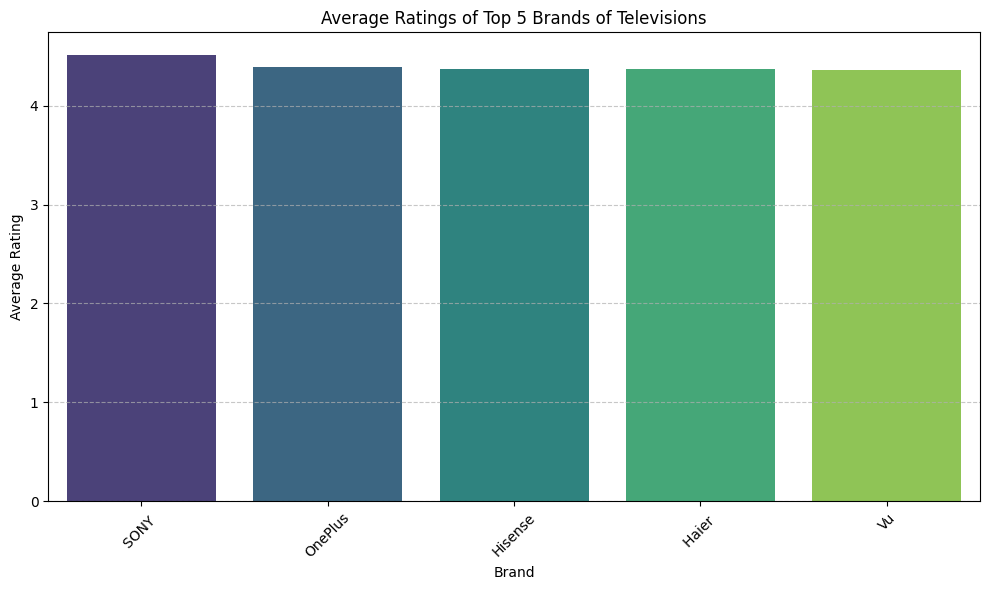

In [61]:
# Plotting the average ratings of different brands using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=top_brands, x='Brand', y='Rating', hue='Brand', palette='viridis', legend=False)
plt.title('Average Ratings of Top 5 Brands of Televisions')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Q.3 Which brand has the highest number of products i.e. television ?

In [81]:
# Count the occurrences of each brand
brand_counts = df['Brand'].value_counts()

In [82]:
highest_count=brand_counts.idxmax()
highest_count

'SAMSUNG'

In [83]:
brand_counts = df['Brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Count']



In [84]:
top_10_brands = brand_counts.head(10)

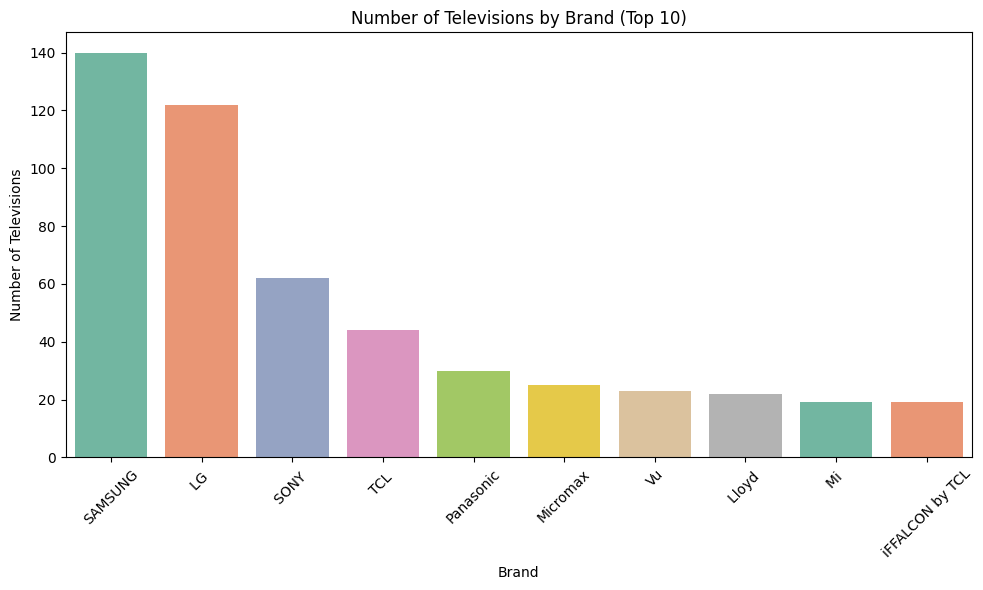

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_brands, x='Brand', y='Count', hue='Brand', palette='Set2', legend=False)
plt.title('Number of Televisions by Brand (Top 10)')
plt.xlabel('Brand')
plt.ylabel('Number of Televisions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Q.4 Are televisions with higher ratings more expensive?

In [90]:
# Calculating the correlation coefficient between ratings and selling prices

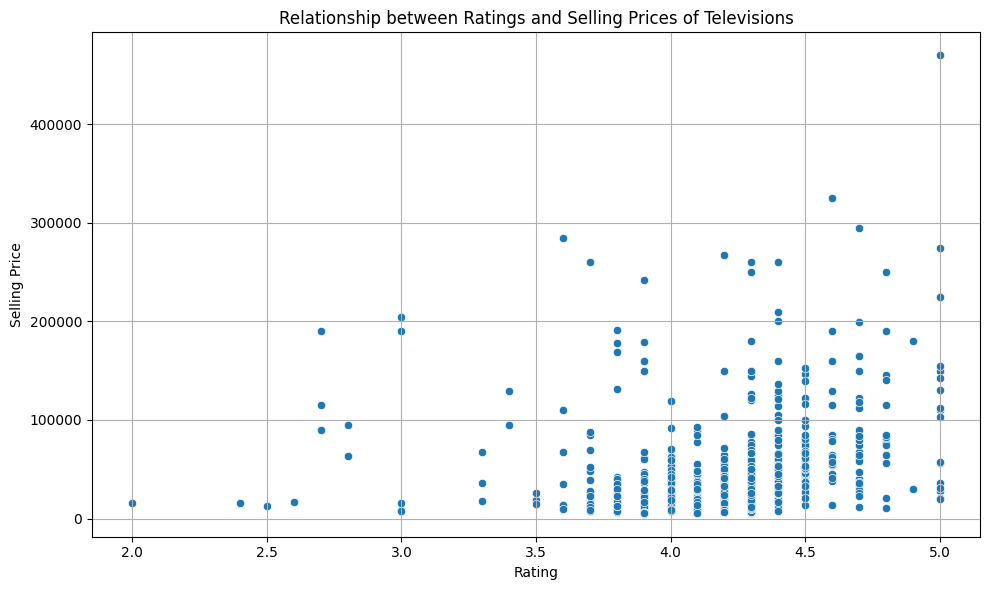

Correlation coefficient between Ratings and Selling Prices: 0.18015038819268292


In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rating', y='Selling Price')
plt.title('Relationship between Ratings and Selling Prices of Televisions')
plt.xlabel('Rating')
plt.ylabel('Selling Price')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculating the correlation coefficient between ratings and selling prices
correlation = df['Rating'].corr(df['Selling Price'])
print("Correlation coefficient between Ratings and Selling Prices:", correlation)

# Q.5 Average Selling Price by Brand

In [96]:
# Assuming df is your DataFrame containing television data
# If not, replace df with your DataFrame name

# Calculate the average selling price by brand
average = df.groupby('Brand')['Selling Price'].mean()

# Display the result
print("Average Selling Price by Brand:")
print(average)


Average Selling Price by Brand:
Brand
AISEN                35462.500000
Acer                 31664.666667
Adsun                15220.428571
Akai                 52002.833333
BPL                  34617.250000
Blaupunkt            23712.333333
Candes               13415.666667
CloudWalker          32331.333333
Compaq               45999.000000
Coocaa               24442.444444
Croma                22365.666667
DETEL                18110.666667
Dektron               6724.000000
Dyanora              15515.666667
G-TEN                16918.375000
HUIDI                18165.666667
Haier                36616.222222
Hisense              89795.400000
IMPEX                28819.384615
Infinix              17165.666667
Intex                27340.714286
JVC                  32496.333333
KODAK                23665.066667
KRISONS               5865.666667
LG                   96914.401639
Lloyd                34161.818182
LumX                 24858.333333
MOTOROLA             38399.000000
MURPHY    

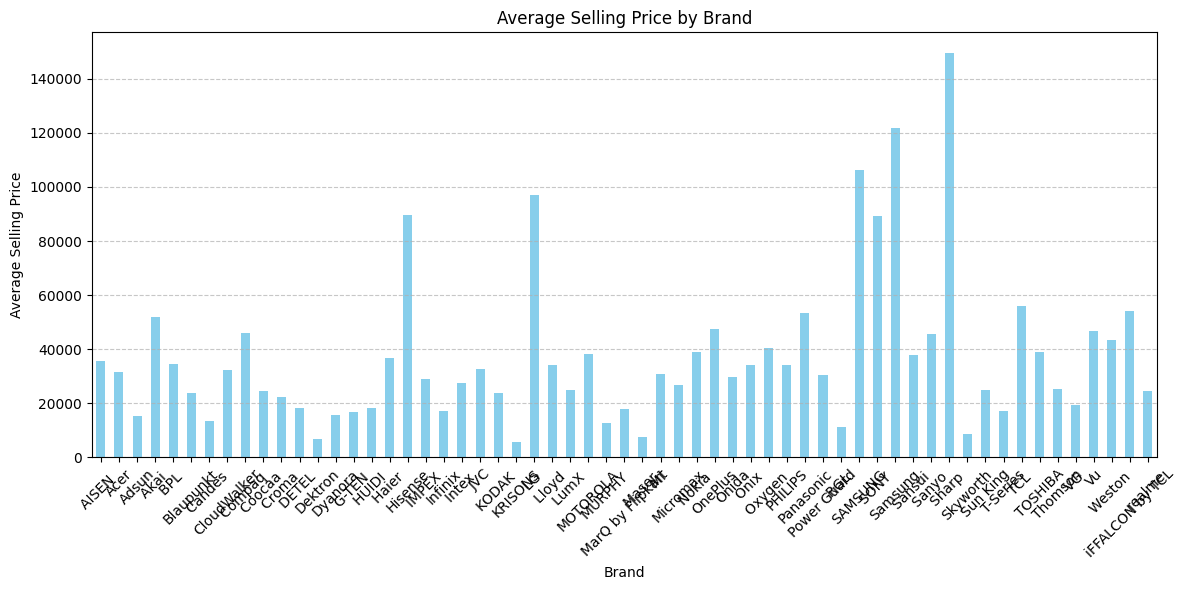

In [97]:
plt.figure(figsize=(12, 6))
average.plot(kind='bar', color='skyblue')
plt.title('Average Selling Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()